# 1.16 使用决策树和随机森林预测员工离职率

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [9]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### 检测空值

In [10]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

### 把是否离职放到第一列

In [11]:
turnOver = df['left']
df.drop(labels = 'left', axis = 1, inplace = True)
df.insert(0, 'left', turnOver)
df.head()

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


In [13]:
df.shape

(14999, 10)

In [14]:
df.dtypes

left                       int64
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

###  计算离职率

In [32]:
np.round(df.left.value_counts()/df.left.count(),2)

0    0.76
1    0.24
Name: left, dtype: float64

In [18]:
df.describe()

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [23]:
df.rename(columns = {'satisfaction_level': 'satisfaction', 
                   'last_evaluation': 'evaluation',
                  'number_project': 'projectCount',
                  'promotion_last_5years': 'promotion'}, inplace = True)

In [44]:
s0 = df[df.left == 0].satisfaction.mean()
s1 = df[df.left == 1].satisfaction.mean()
print('非离职员工的满意度: {:.2f}\n'.format(s0))
print('离职员工的满意度: {:.2f}\n'.format(s1))

非离职员工的满意度: 0.67

离职员工的满意度: 0.44



###  计算相关性

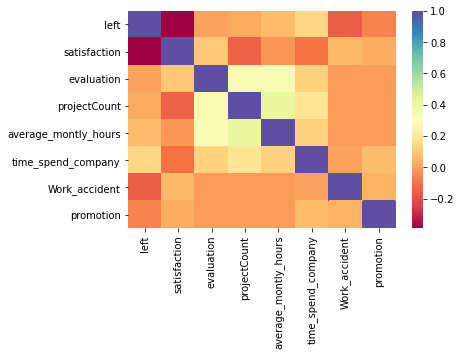

In [30]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Spectral')

###  统计检验：T 检验 
***
**看 离职 非离职 员工满意度是否明显不同**<br/>
**<font color=red> H0: u0 = u1; H1: u0 != u1 </font><br/>**
**单侧T检验观察 样本均值 和 总均值是否一致** 


In [45]:
import scipy.stats as stats 
stats.ttest_1samp(df[df.left ==1].satisfaction, # 离职员工的满意度样本
                          df[df.left == 0].satisfaction.mean())

Ttest_1sampResult(statistic=-51.3303486754725, pvalue=0.0)

**P Value 为0， 显著不同** 
***


###  置信区间
***
**置信度设为95%，alpha为 0.05, 分位数为上侧面积为 <font color = red>0.025 到 0.975 </font>的区间**

In [47]:
degree_freedom = len(df[df.left == 1])
LQ = stats.t.ppf(0.025, degree_freedom)
RQ = stats.t.ppf(0.975, degree_freedom)
print ('The t-分布 左边界: ' + str(LQ))
print ('The t-分布 右边界: ' + str(RQ))

The t-分布 左边界: -1.9606285215955626
The t-分布 右边界: 1.9606285215955621


**t 值为 -51.3，小于左边界，拒绝原假设**

###  工作评价的概率密度函数

[Text(0, 0.5, 'frequency'), Text(0.5, 0, 'evaluation')]

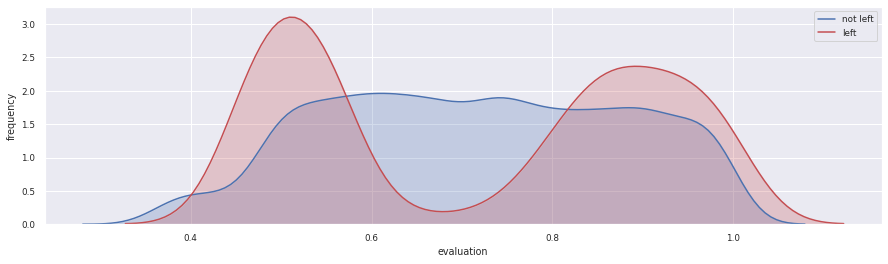

In [64]:
fig = plt.figure(figsize = (15,4))



ax = sns.kdeplot(df[df.left==0].evaluation, color = 'b', shade = True, label = 'not left')
ax = sns.kdeplot(df[df.left==1].evaluation, color = 'r', shade = True, label = 'left')
ax.set(xlabel = 'evaluation', ylabel = 'frequency')

## 预处理：构建训练集和测试集

In [70]:
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,\
classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve

In [71]:
df.dtypes

left                      int64
satisfaction            float64
evaluation              float64
projectCount              int64
average_montly_hours      int64
time_spend_company        int64
Work_accident             int64
promotion                 int64
Department               object
salary                   object
dtype: object

### 1. 将Department 和 salary 编码为数字型

In [74]:
df.Department = df.Department.astype('category').cat.codes
df.salary = df.salary.astype('category').cat.codes

### 2. 构建目标值y和特征值X

In [77]:
y = df.left 
X = df.drop('left', axis = 1)

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

### 3. 按原比例划分训练集和测试集

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 123, stratify = y)

# 决策树

In [68]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image 
import pydotplus 


In [83]:
dtree = tree.DecisionTreeClassifier(criterion = 'entropy', min_weight_fraction_leaf = 0.01)
# 叶子节点至少包含多少样本，防止过拟合
dtree = dtree.fit(X_train, y_train)

## 计算指标

In [86]:
dt_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
print('决策树的 AUC 为{:.2f}\n'.format(dt_roc_auc))
print(classification_report(y_test, dtree.predict(X_test)))

决策树的 AUC 为0.93

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1714
           1       0.93      0.89      0.91       536

    accuracy                           0.96      2250
   macro avg       0.95      0.93      0.94      2250
weighted avg       0.96      0.96      0.96      2250



## 使用 GraphViz 和  pydotplus 可视化

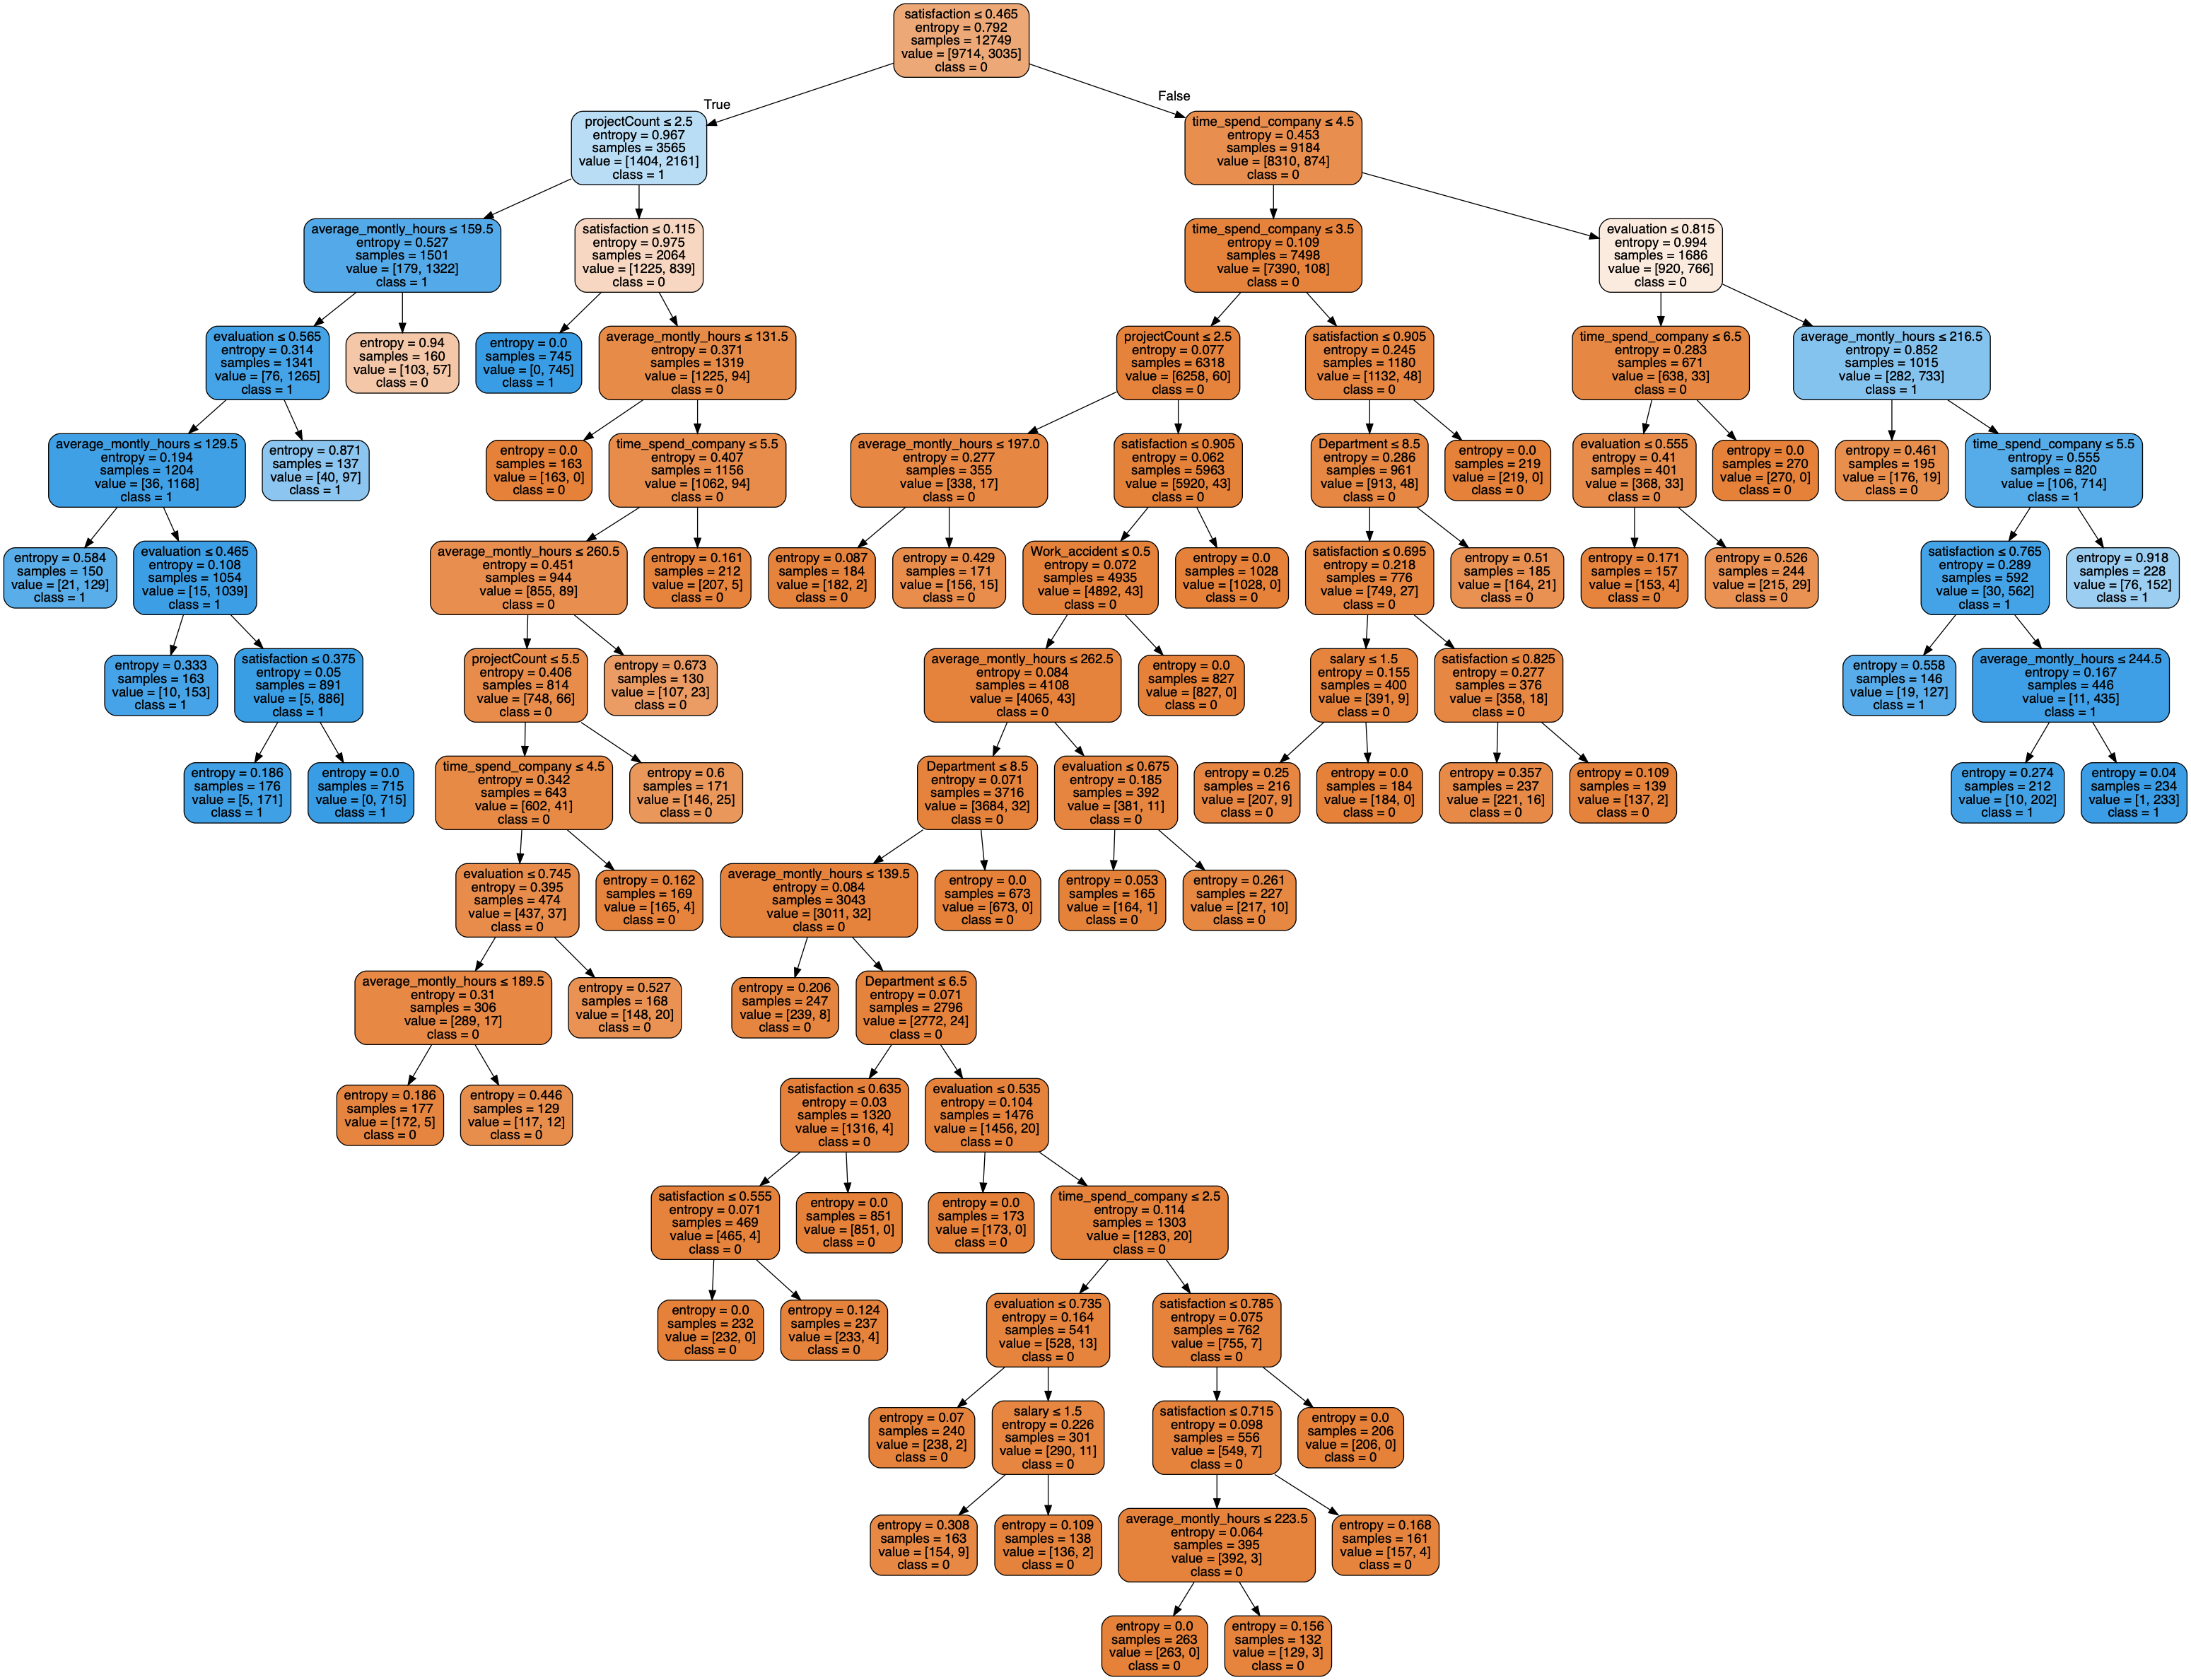

In [91]:
feature_names = df.columns[1:]
dot_data = StringIO()
export_graphviz(dtree, out_file = dot_data, filled = True, 
                rounded = True,  special_characters=True,
                feature_names = feature_names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('leave.png')
Image(graph.create_png())

## 决策树得到的重要性分布

In [99]:
importances = dtree.feature_importances_
feat_names = df.columns[1:]
indices = np.argsort(importances)[::-1] # 从最后一个下标 从后向前读取
importances

array([0.50994642, 0.09110667, 0.08448558, 0.07949921, 0.22867107,
       0.00142892, 0.        , 0.00349853, 0.00136358])

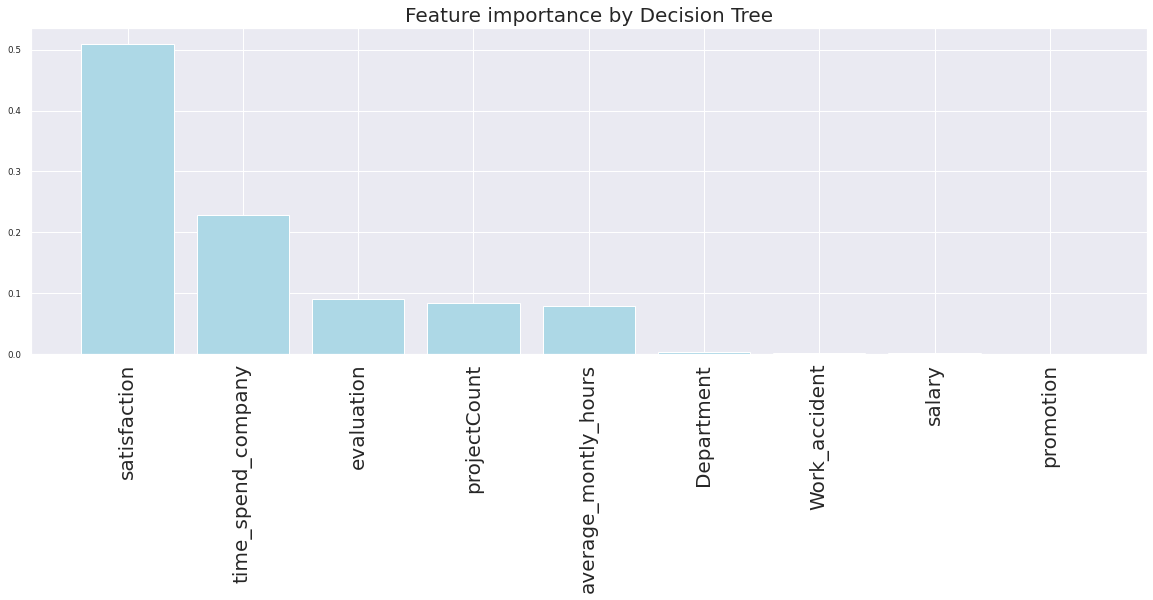

In [106]:
plt.figure(figsize = (20,6))
plt.title('Feature importance by Decision Tree', fontsize = 20)
plt.bar(feat_names[indices], importances[indices], color = 'lightblue', align = 'center')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=20)
plt.show()

# 随机森林

In [107]:
# 实例化随机森林
rf = RandomForestClassifier(
    criterion='entropy',
    n_estimators=3, 
    max_depth=None, # 定义树的深度, 可以用来防止过拟合
    min_samples_split=10, # 定义至少多少个样本的情况下才继续分叉
    #min_weight_fraction_leaf=0.02 # 定义叶子节点最少需要包含多少个样本(使用百分比表达), 防止过拟合
    )
# 模型训练
rf.fit(X_train, y_train)
# 计算指标参数
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("随机森林 AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))

随机森林 AUC = 0.97
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1714
           1       0.98      0.94      0.96       536

    accuracy                           0.98      2250
   macro avg       0.98      0.97      0.98      2250
weighted avg       0.98      0.98      0.98      2250



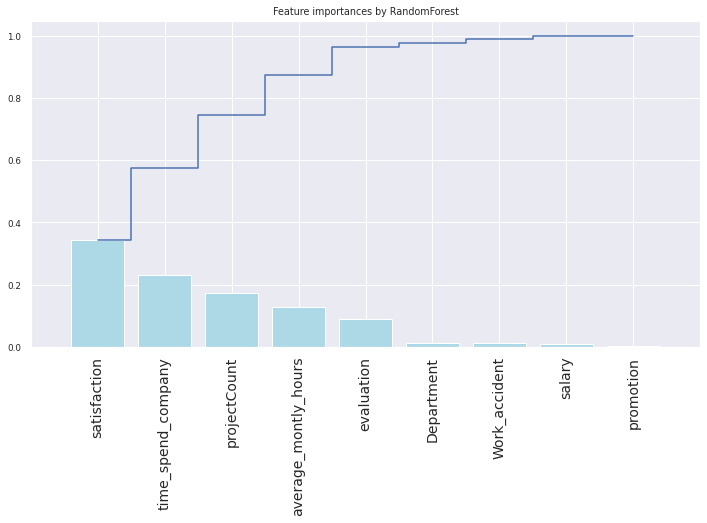

In [110]:
# 特征的重要程度
importances = rf.feature_importances_
# 特征名称
feat_names = df.drop(['left'],axis=1).columns
# 排序
indices = np.argsort(importances)[::-1]
# 绘图
plt.figure(figsize=(12,6))
plt.title("Feature importances by RandomForest")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

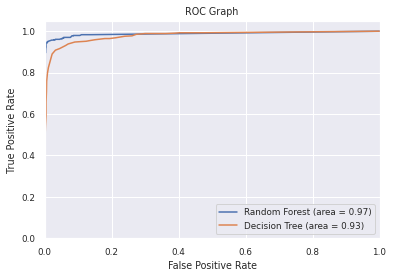

In [111]:
# ROC 图
from sklearn.metrics import roc_curve
# 计算ROC曲线
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])

plt.figure()

# 随机森林 ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

# 决策树 ROC
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
# 绘图
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()